#### Q2: We will use the fashion-MNIST dataset for this question (you can download it from any other source also including libraries). Flatten and preprocess the data (if required) before starting the tasks. It will become a 784-dimensional data with 10 classes, more details are available in the link.
#### a) Train the k-means model on f-MNIST data with k = 10 and 10 random 784-dimensional points (in input range) as initializations. Report the number of points in each cluster.
#### b) Visualize the cluster centers of each cluster as 2D images of all clusters.
#### c) Visualize 10 images corresponding to each cluster.
#### d) Train another k-means model with 10 images from each class as initializations , report the number of points in each cluster, and visualize the cluster centers.
#### e) Visualize 10 images corresponding to each cluster.
#### f) Evaluate Clusters of part a and part d with Sum of Squared Error (SSE) method. Report the scores and comment on which case is a better clustering

In [377]:
from pandas import  read_csv
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from numpy import argmax, unique
from sklearn.datasets import fetch_openml


In [378]:

fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)

In [379]:
fashion_mnist.data

train_data = fashion_mnist.data[:60000]

train_data.shape

(60000, 784)

##### we will be segregating the label data and image data over here

In [380]:
image_train_data = train_data.astype('uint8')

image_train_data.shape


(60000, 784)

#### Performing a transformation

In [381]:
pca = PCA(n_components=784).fit(image_train_data)

scaler = MinMaxScaler()


scaled_data = scaler.fit_transform(image_train_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#### Finding the cumulative variance so that with less no of dimension we can hold maximum variance

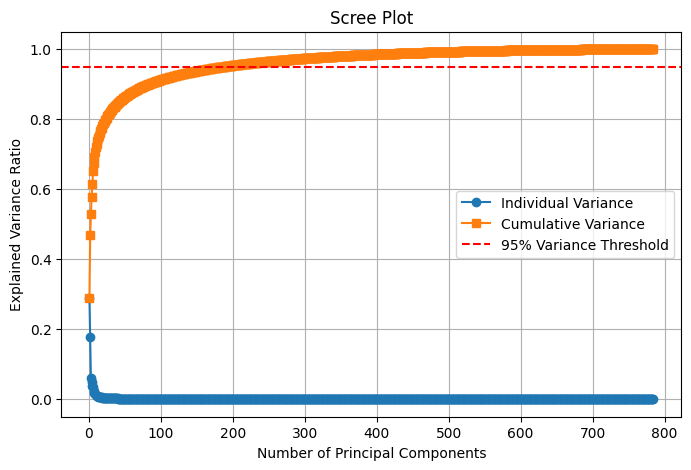

Optimal number of components (k) for 95% variance: 187


In [382]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', label='Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

optimal_k = argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components (k) for 95% variance: {optimal_k}")

##### Now we have got the optimal point where we have a 95% variance we will configure the pca components to 187 and then transformed the data

In [383]:
pca.n_components = optimal_k
pca_train_data = pca.fit_transform(scaled_data)

pca_train_data.shape

(60000, 187)

#### a) Train the k-means model on f-MNIST data with k = 10 and 10 random 784-dimensional points (in input range) as initializations. Report the number of points in each cluster.

In [384]:

kmeans = KMeans(n_clusters=10, init='random',n_init=10, random_state=42).fit(pca_train_data)
predicted_random_data = kmeans.predict(pca_train_data)

cluster_labels,cluster_counts = unique(predicted_random_data,return_counts=True)

for cluster_label, cluster_count in zip(cluster_labels, cluster_counts):
    print(f"Cluster {cluster_label}: {cluster_count} samples")



Cluster 0: 2898 samples
Cluster 1: 9619 samples
Cluster 2: 7392 samples
Cluster 3: 4294 samples
Cluster 4: 9077 samples
Cluster 5: 2571 samples
Cluster 6: 2346 samples
Cluster 7: 7467 samples
Cluster 8: 6574 samples
Cluster 9: 7762 samples


#### b) Visualize the cluster centers of each cluster as 2D images of all clusters.

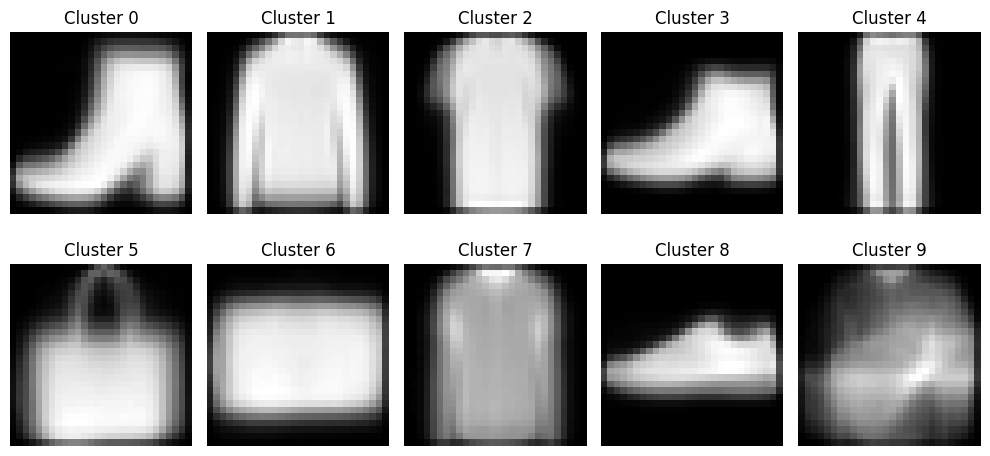

In [385]:
cluster_centers = kmeans.cluster_centers_

centre_image_data = pca.inverse_transform(cluster_centers)
centre_image_data = scaler.inverse_transform(centre_image_data)
centre_image_data = centre_image_data.reshape(-1, 28, 28).astype('uint8')
plt.figure(figsize=(10, 5))
for i in range(len(cluster_centers)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centre_image_data[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Cluster {i}')
plt.tight_layout()
plt.show()

In [386]:
predicted_random_data[:10]

array([0, 2, 9, 7, 4, 1, 8, 1, 9, 9], dtype=int32)

#### c) Visualize 10 images corresponding to each cluster.

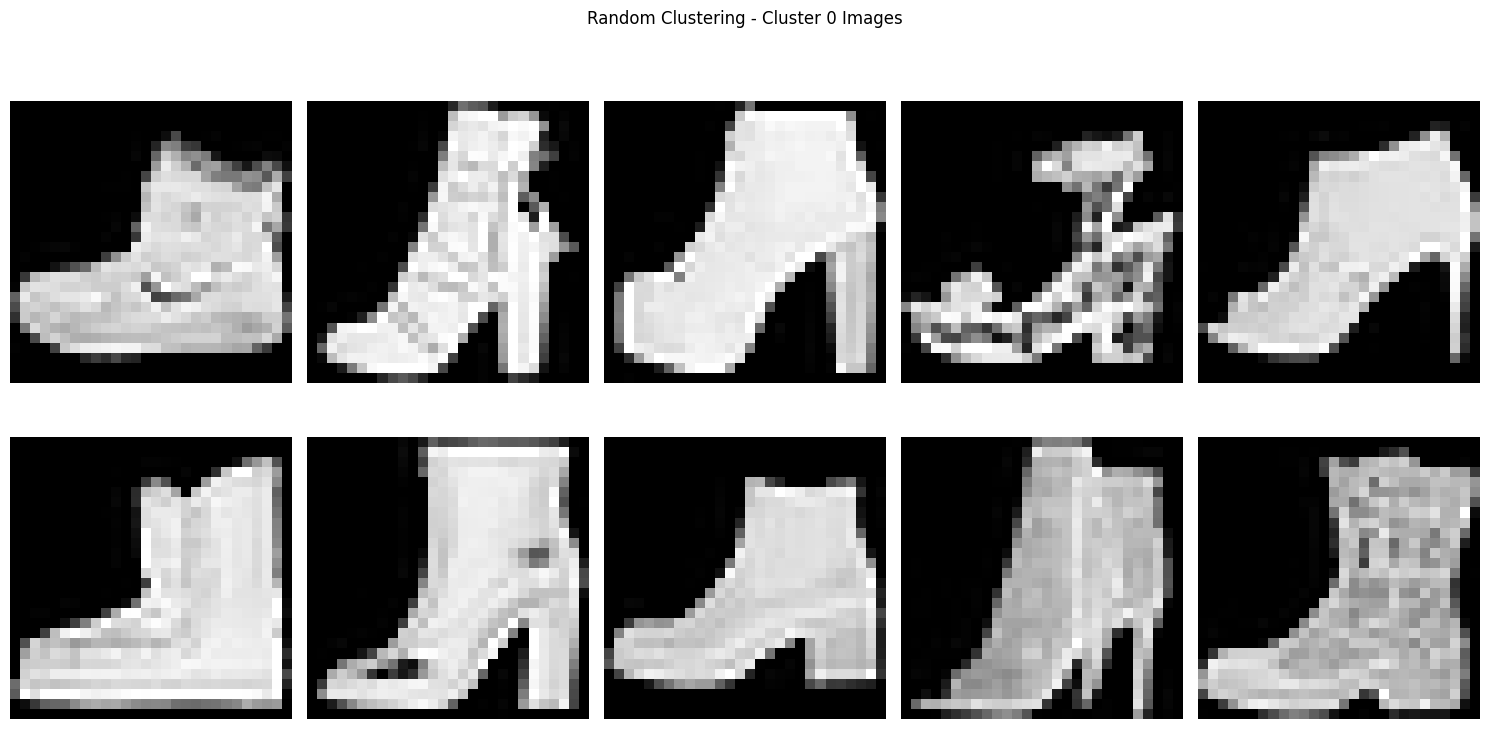

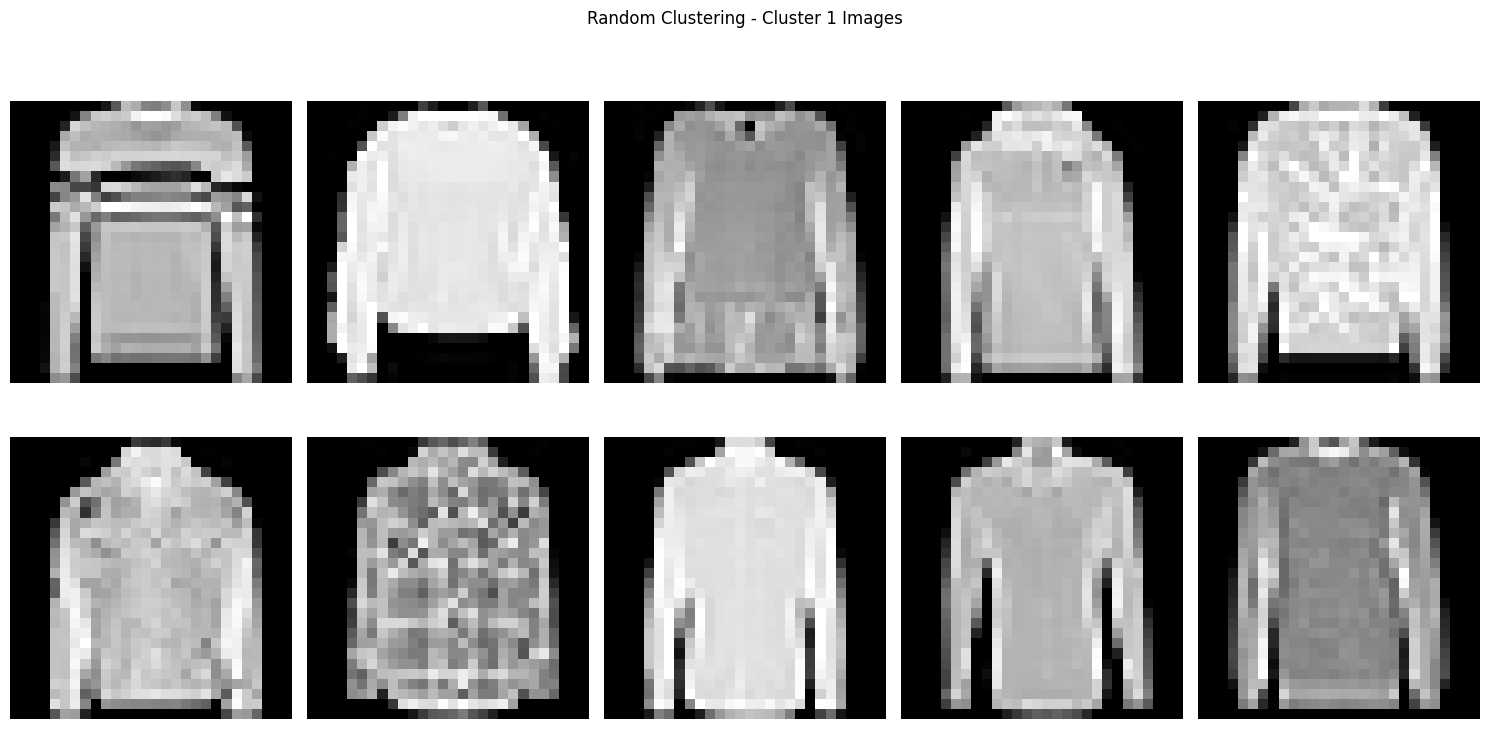

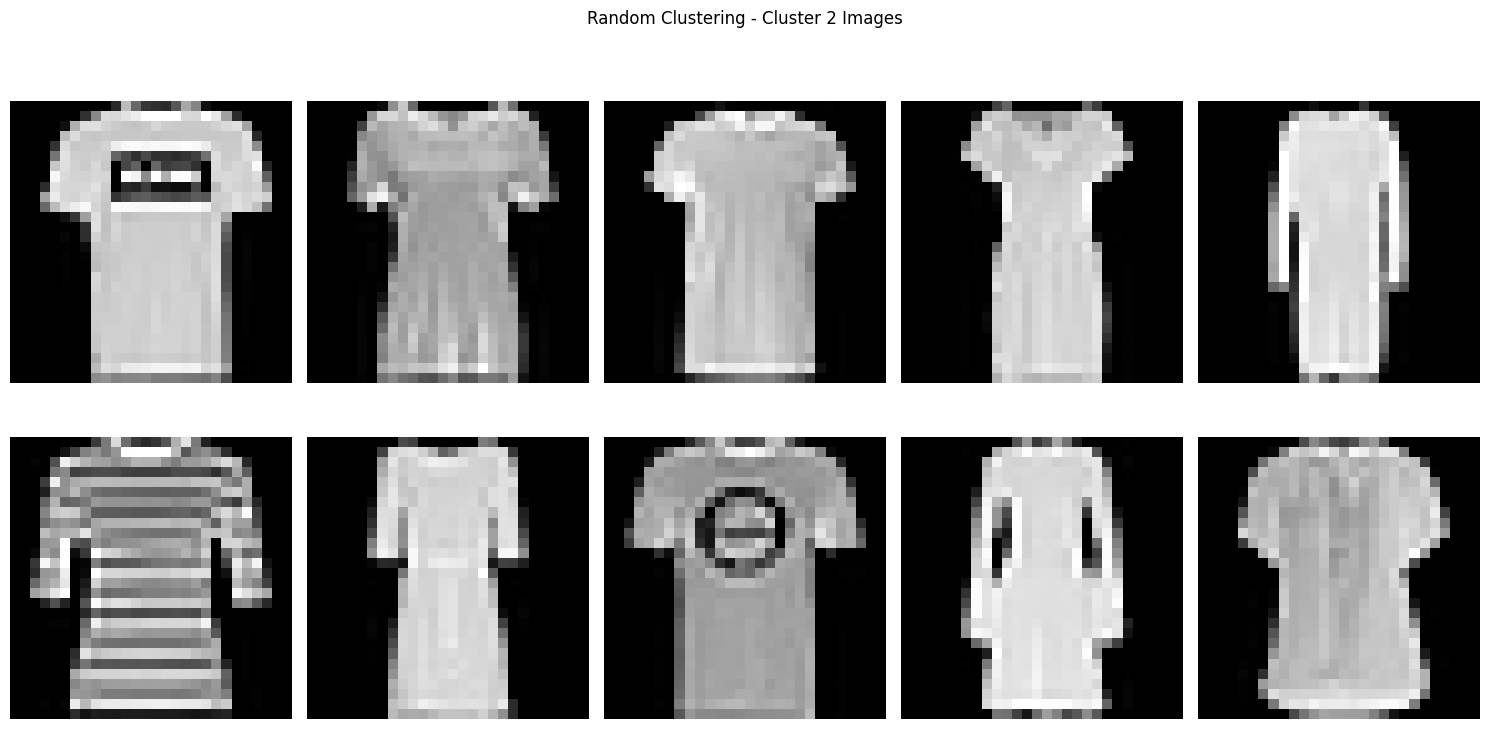

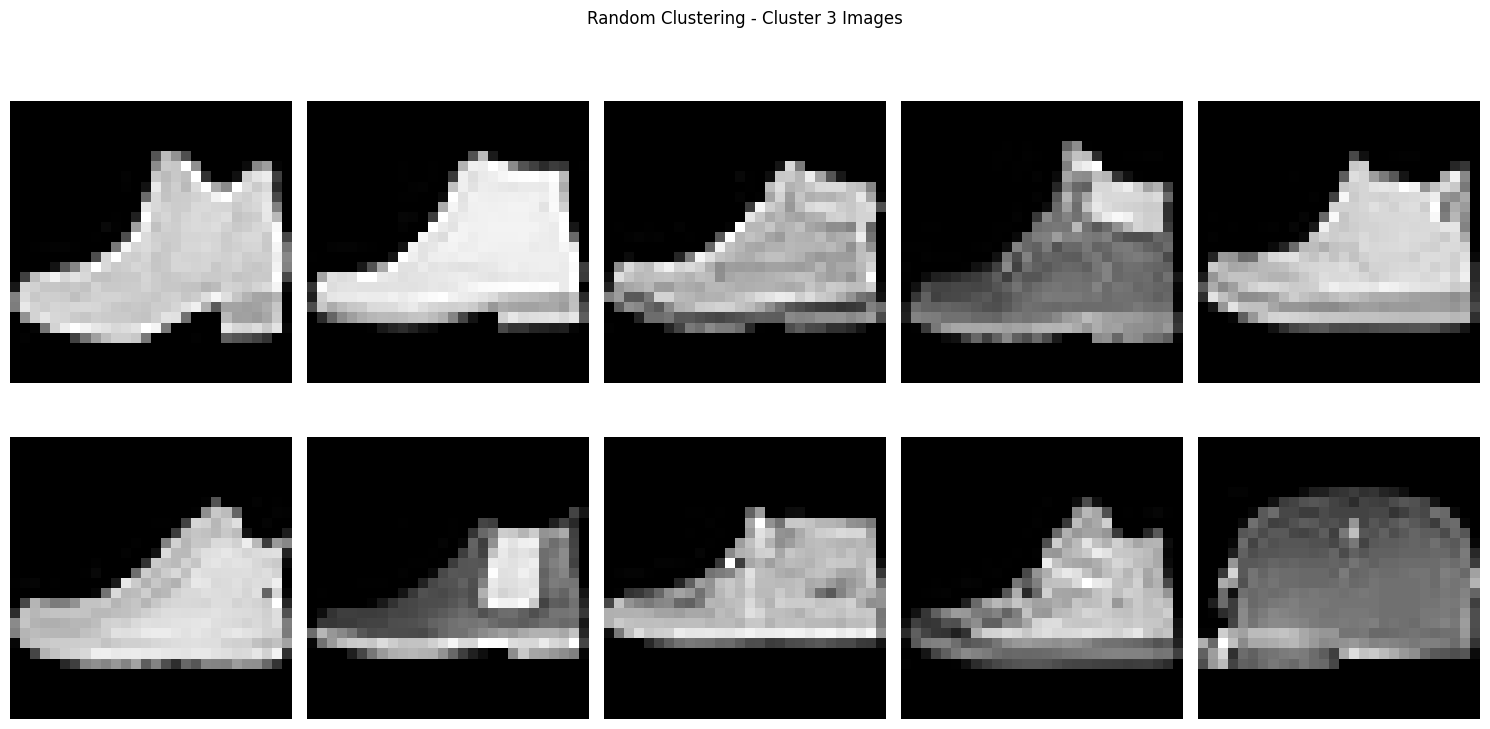

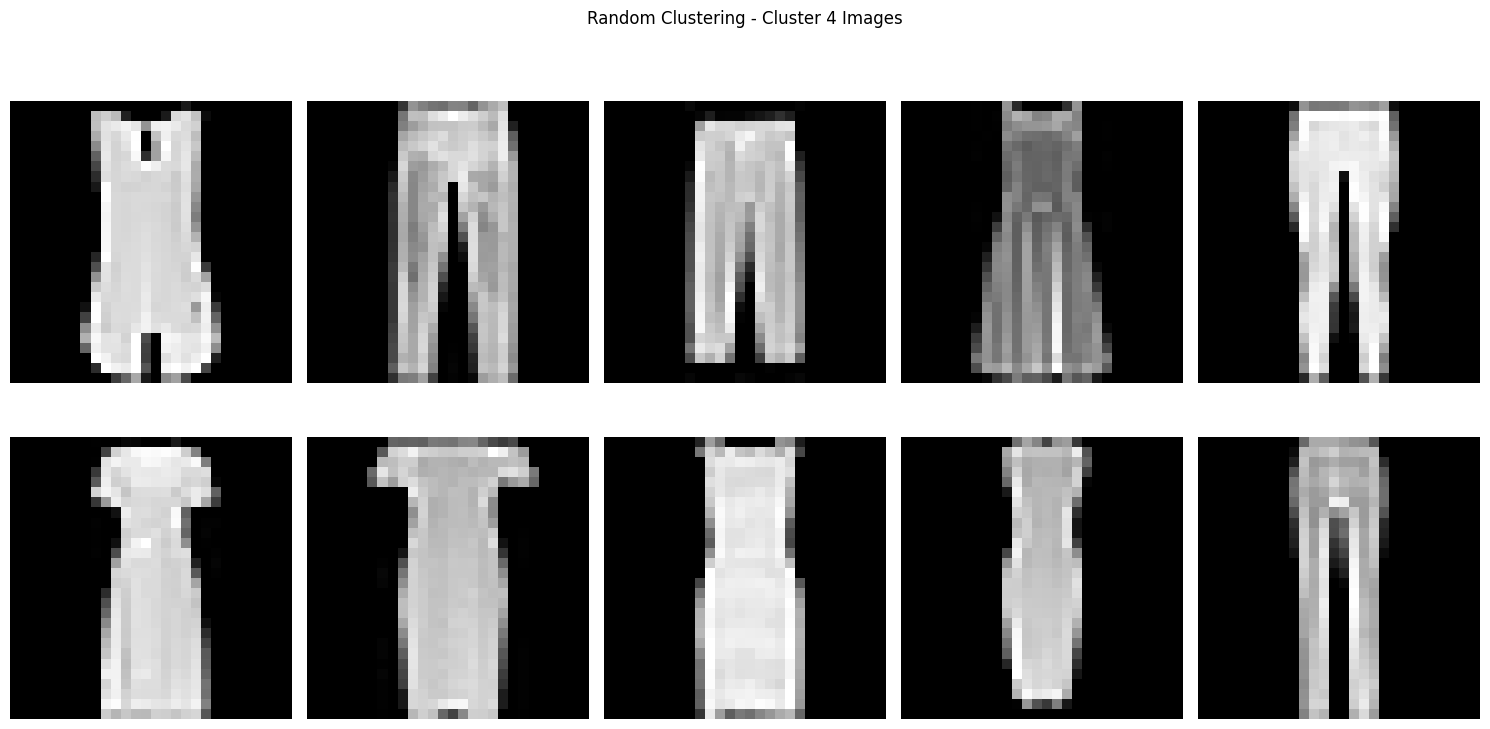

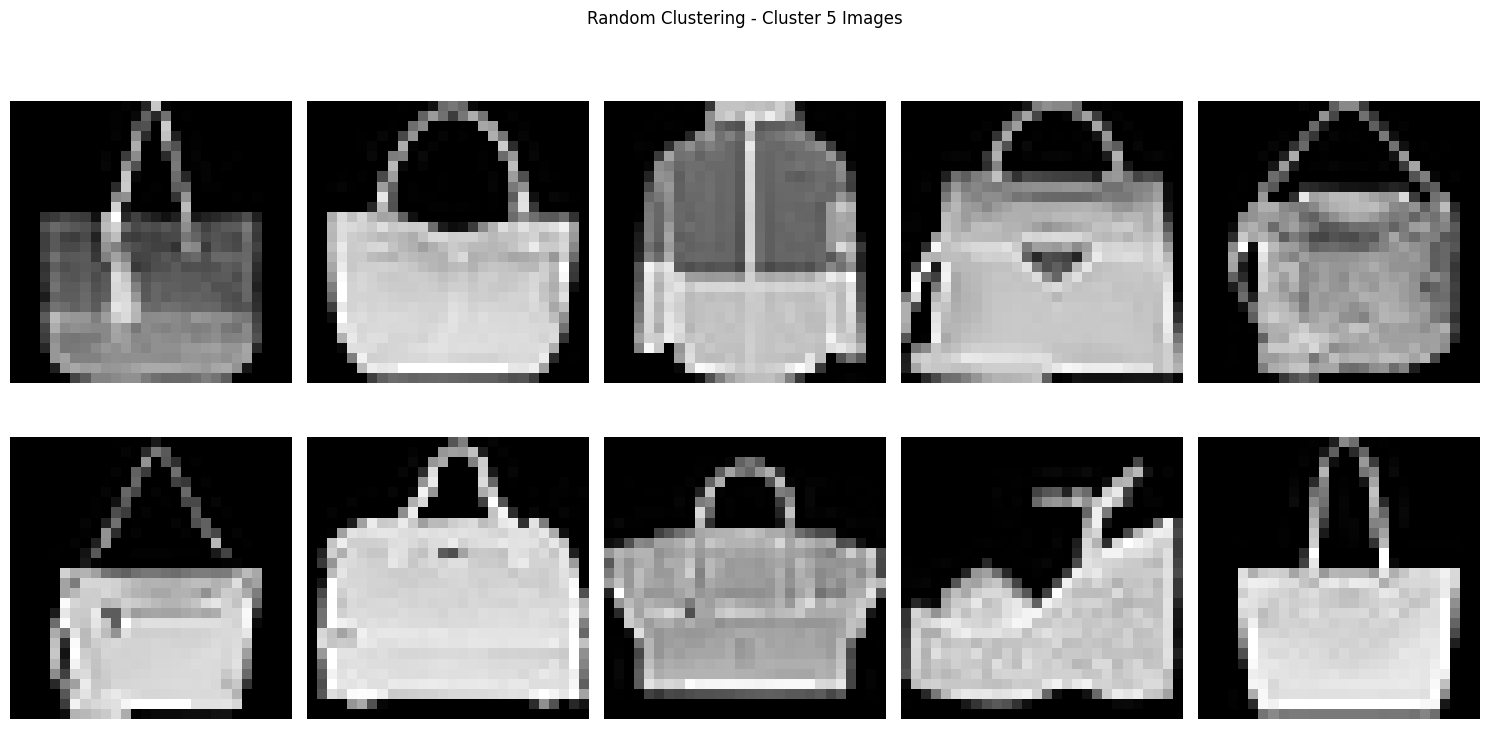

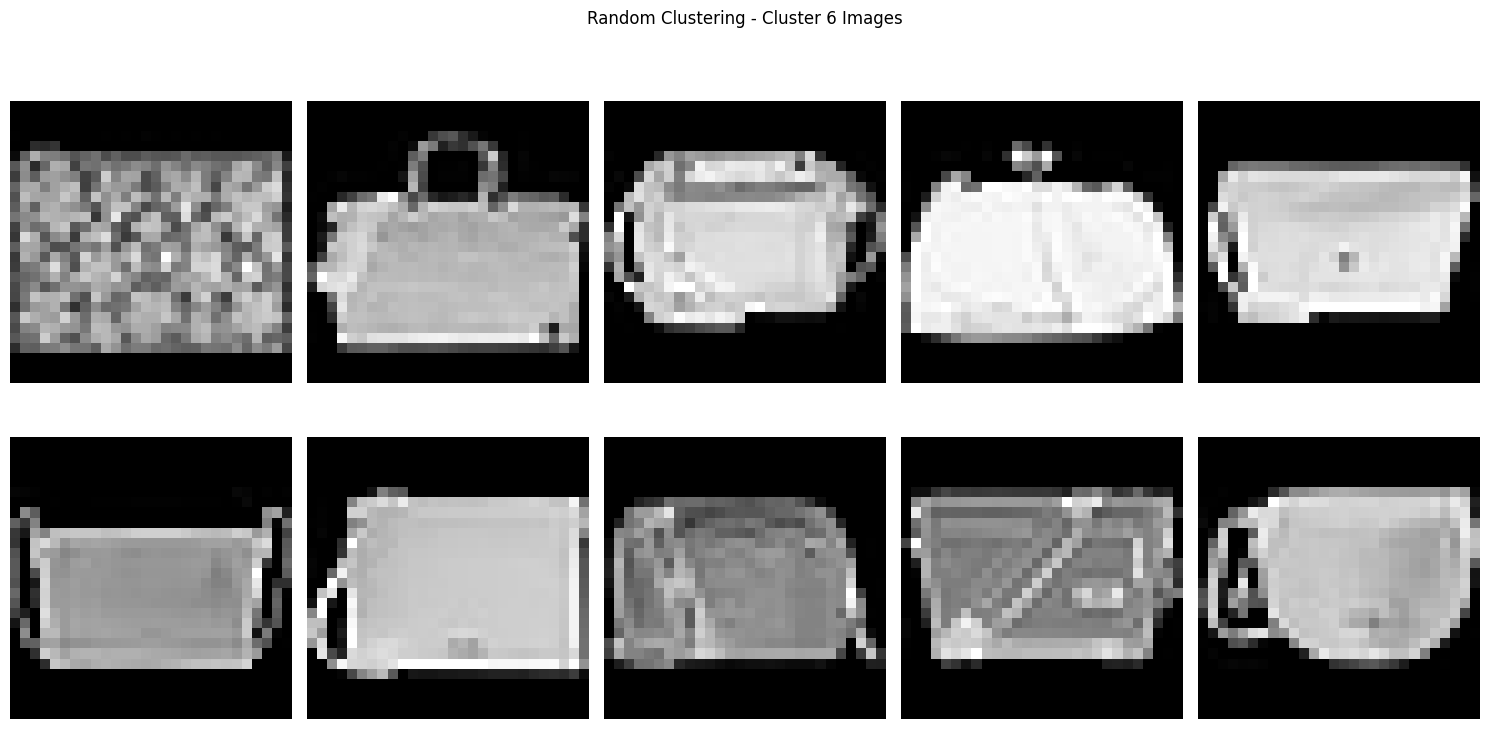

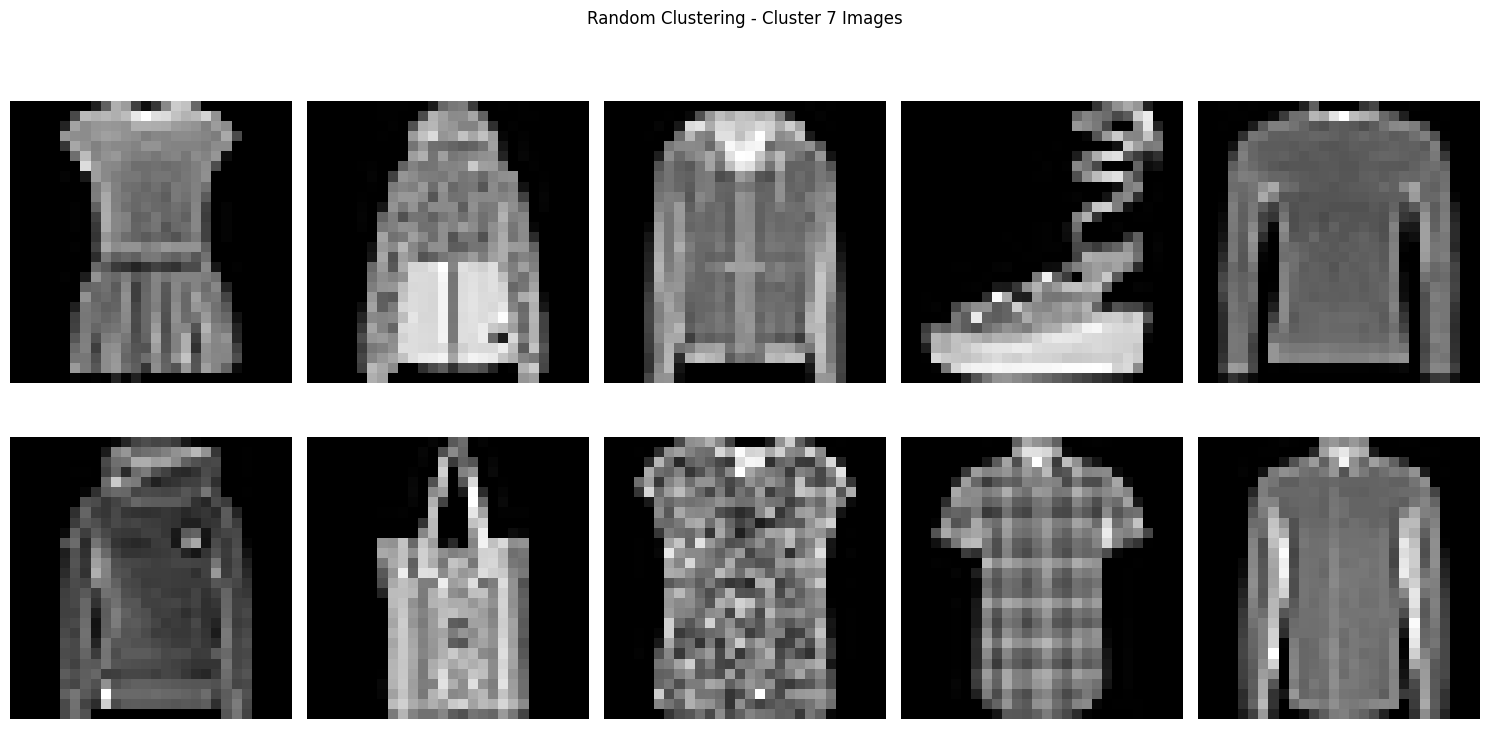

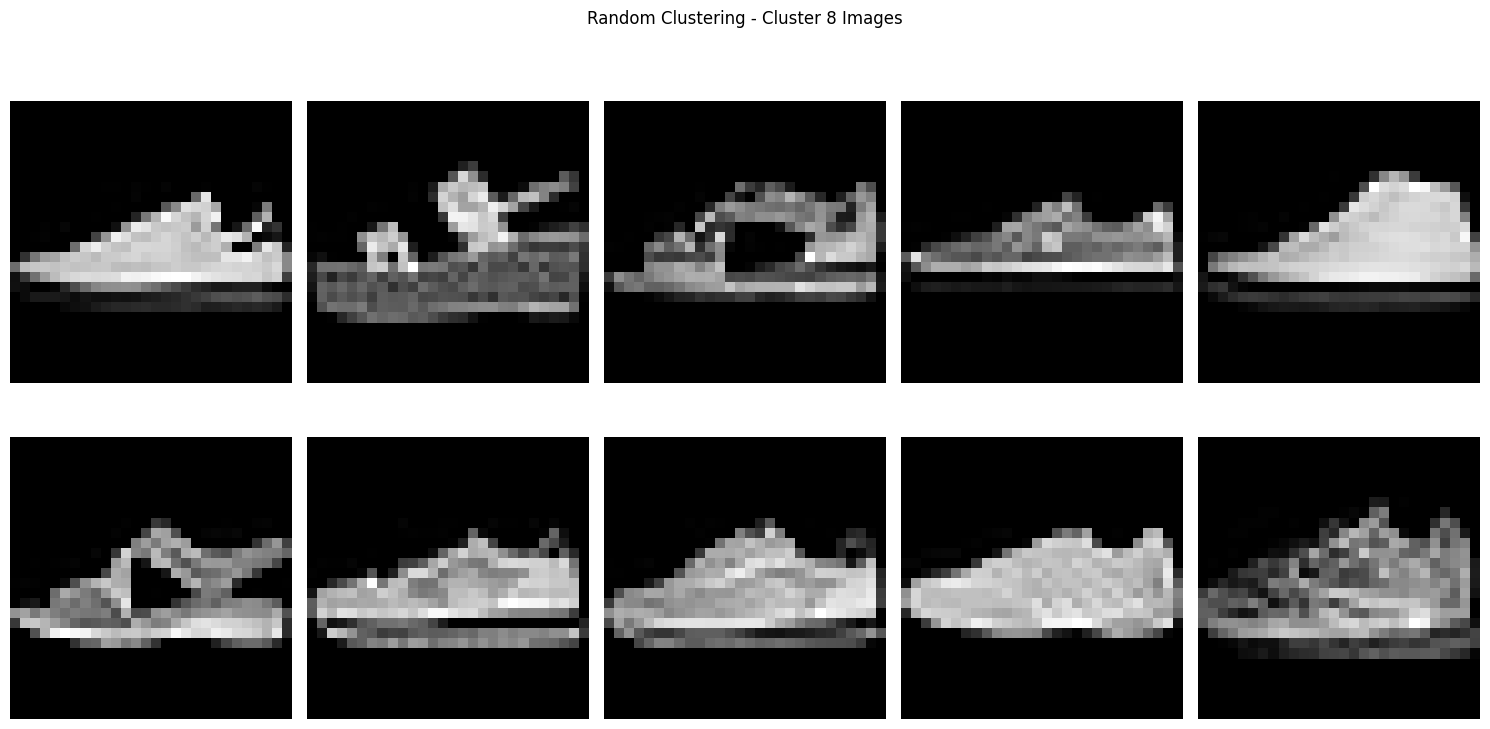

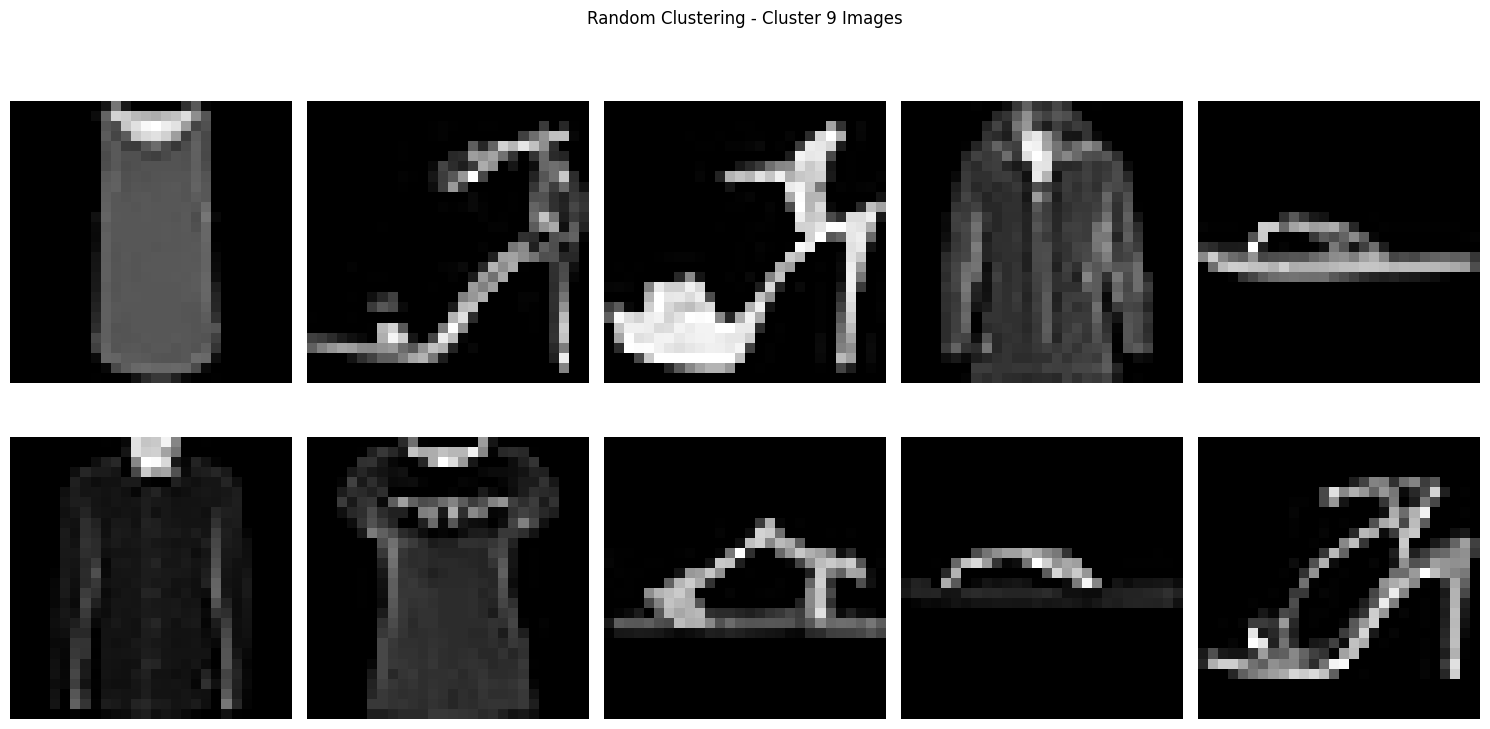

In [387]:
for cluster_idx in cluster_labels:
    plt.figure(figsize=(15, 8))
    cluster_indices = np.where(predicted_random_data == cluster_idx)[0]
    sample_indices = cluster_indices[:10] if len(cluster_indices) >= 10 else cluster_indices
    
    for i, idx in enumerate(sample_indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(image_train_data[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Random Clustering - Cluster {cluster_idx} Images")
    plt.tight_layout()

#### d) Train another k-means model with 10 images from each class as initializations , report the number of points in each cluster, and visualize the cluster centers.

In [388]:
class_init = np.zeros((10, optimal_k))

for idx in range(10):
    class_indices = np.where(predicted_random_data == idx)[0]
    selected_indices = class_indices[:10]

    class_init[i] = np.mean(pca_train_data[selected_indices], axis=0)


kmeans_class = KMeans(n_clusters = 10,init=class_init,n_init=10)

kmeans_class.fit(pca_train_data)

predicted_class_data = kmeans_class.predict(pca_train_data)

In [389]:
cluster_labels,cluster_counts = unique(predicted_random_data,return_counts=True)

for cluster_label, cluster_count in zip(cluster_labels, cluster_counts):
    print(f"Cluster {cluster_label}: {cluster_count} samples")



Cluster 0: 2898 samples
Cluster 1: 9619 samples
Cluster 2: 7392 samples
Cluster 3: 4294 samples
Cluster 4: 9077 samples
Cluster 5: 2571 samples
Cluster 6: 2346 samples
Cluster 7: 7467 samples
Cluster 8: 6574 samples
Cluster 9: 7762 samples


#### e) Visualize 10 images corresponding to each cluster.

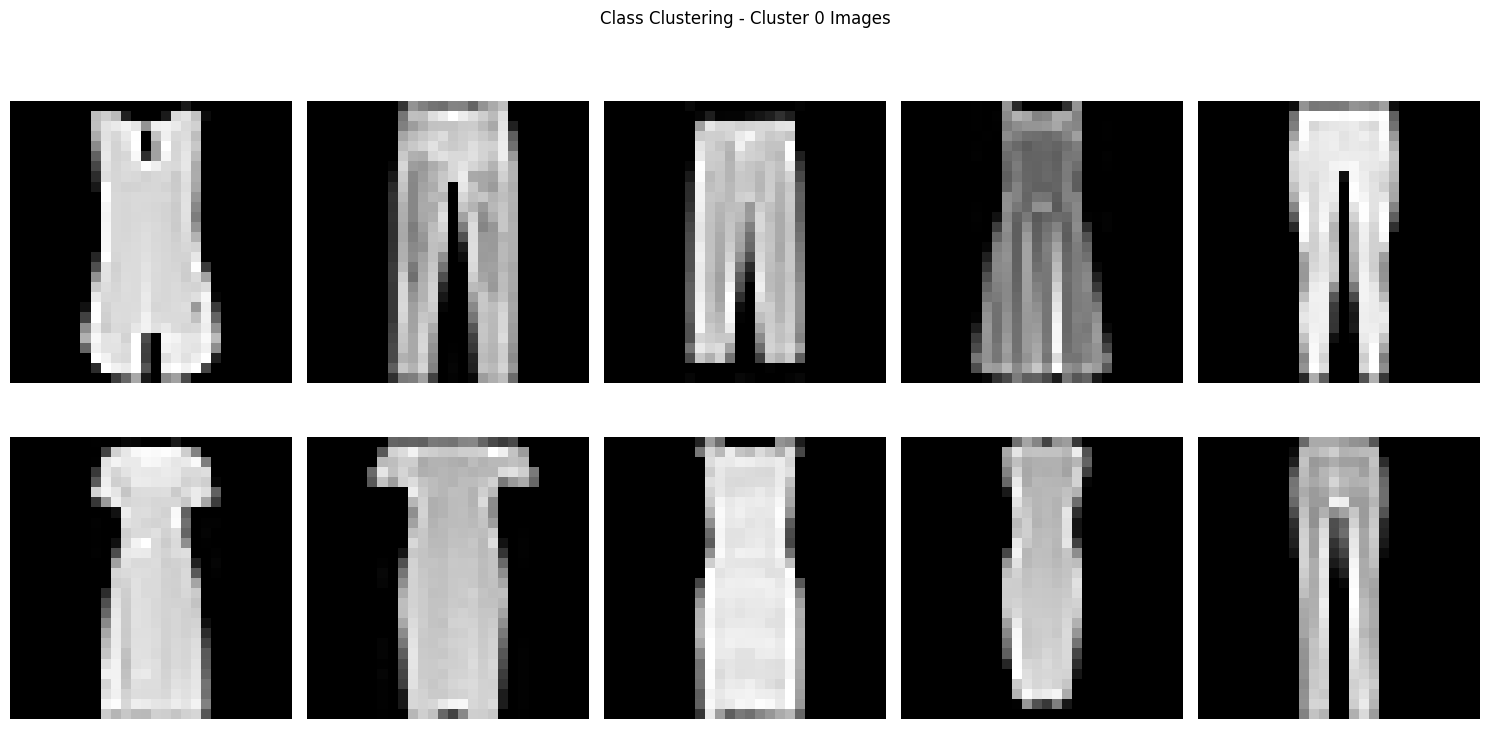

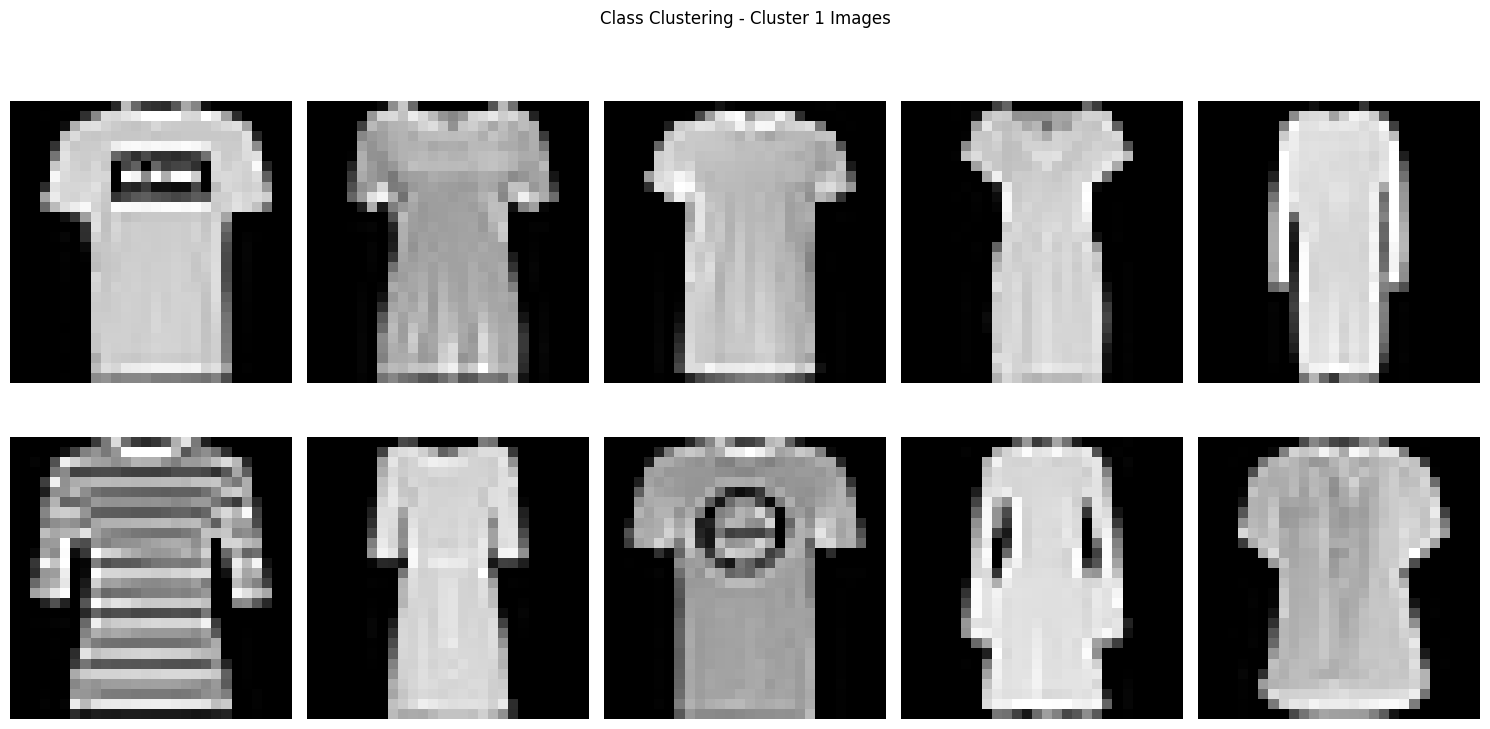

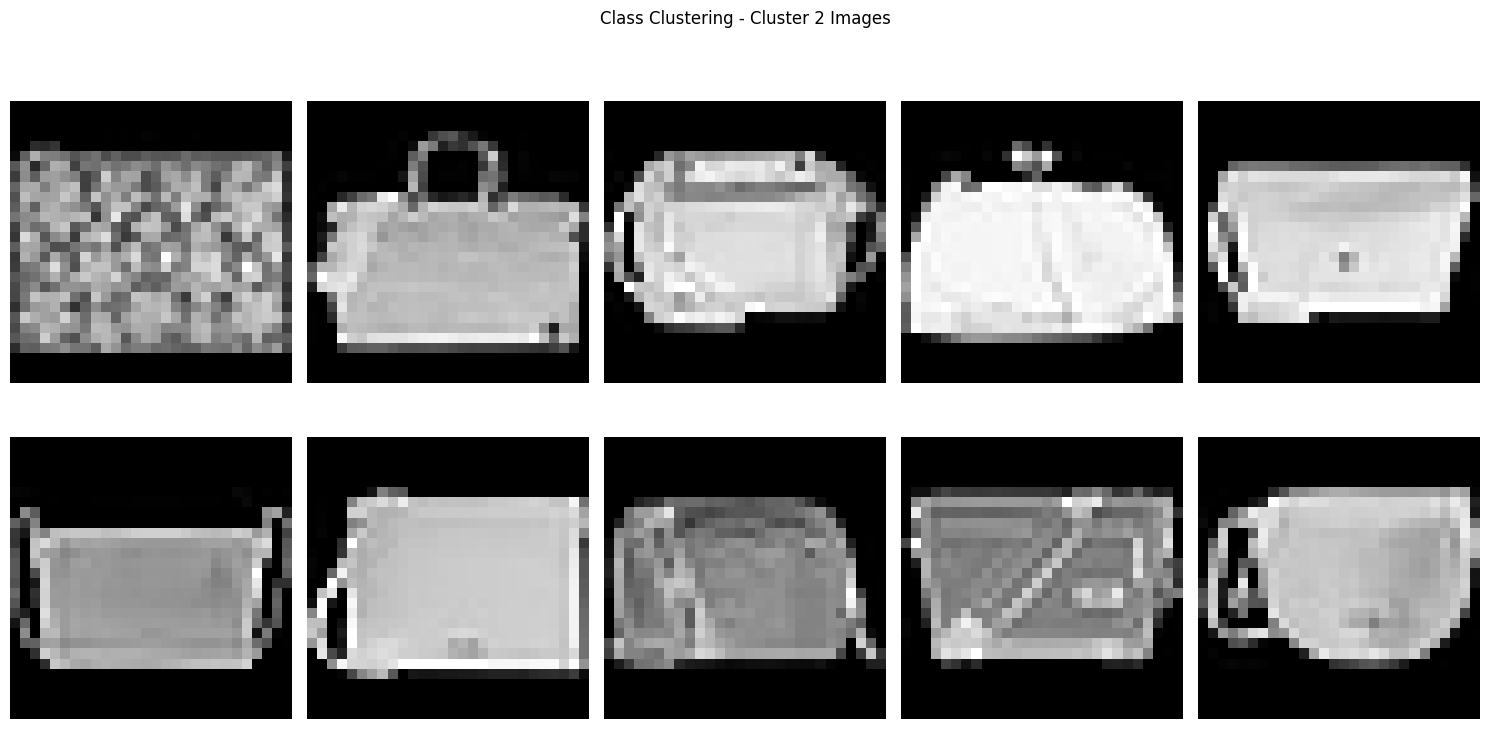

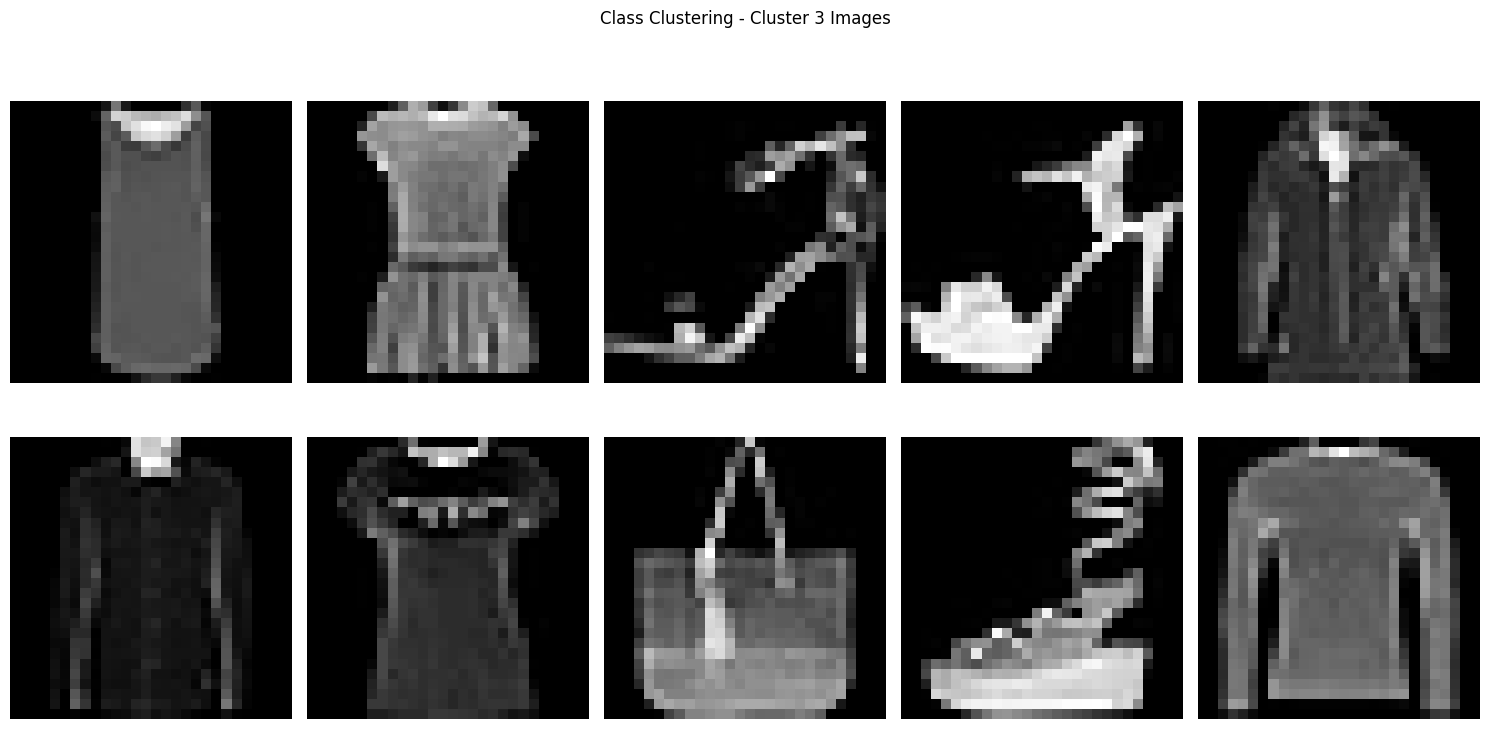

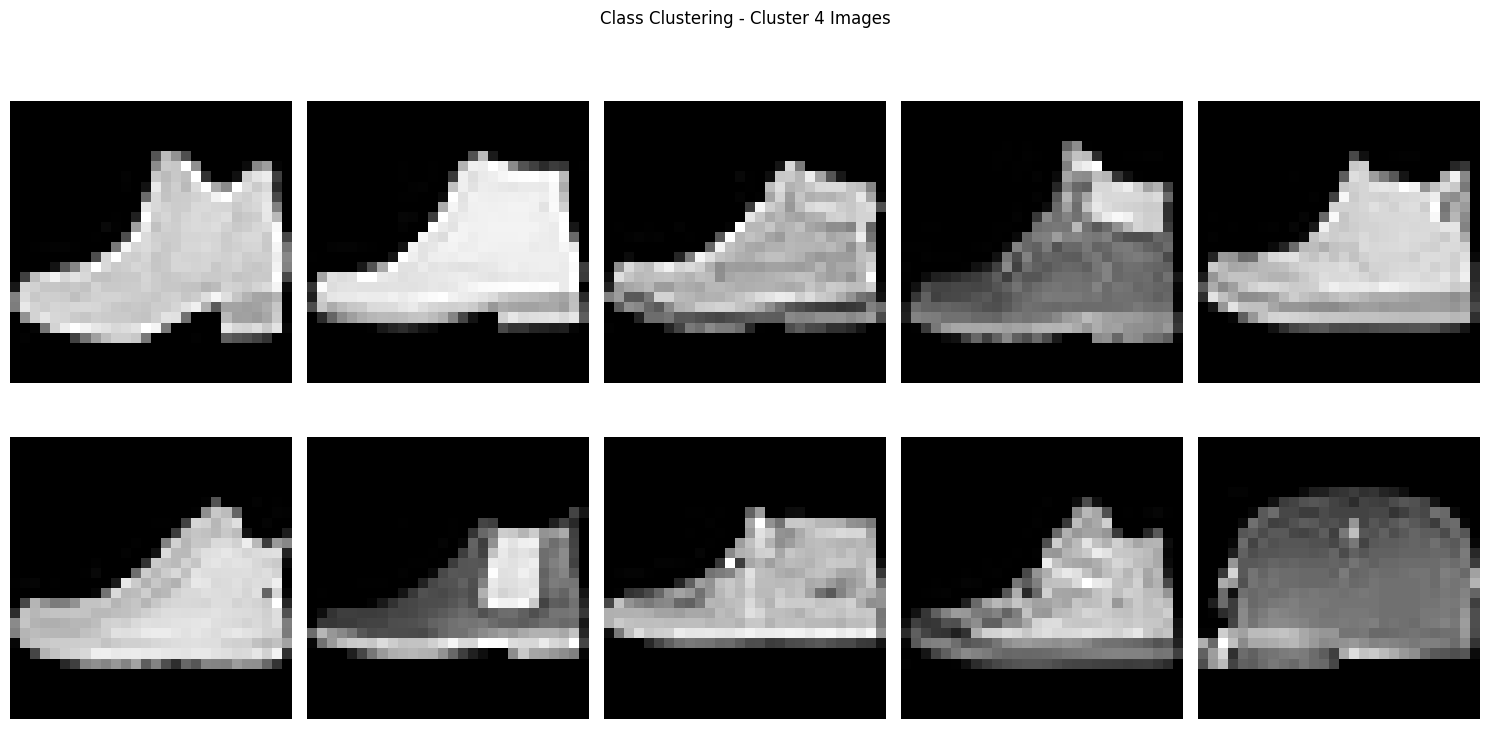

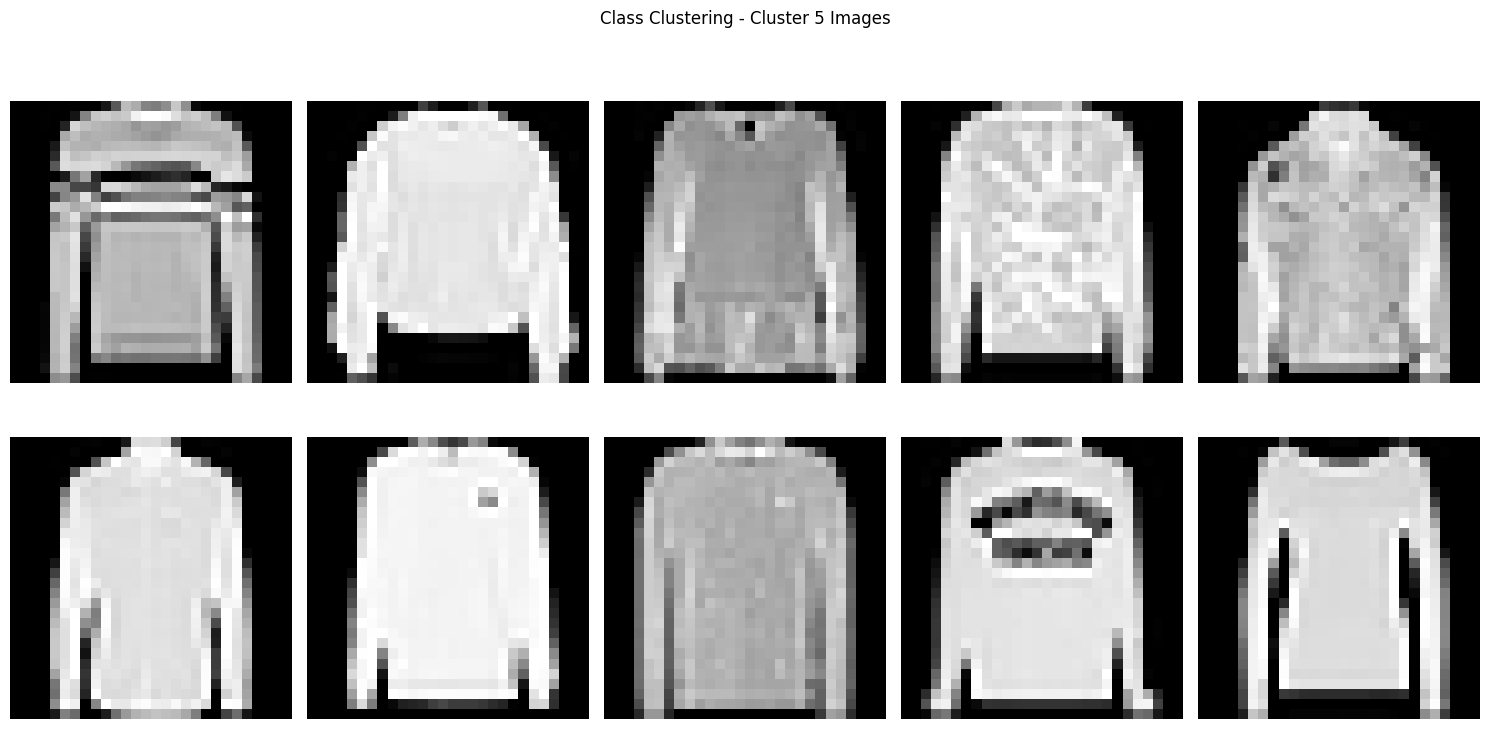

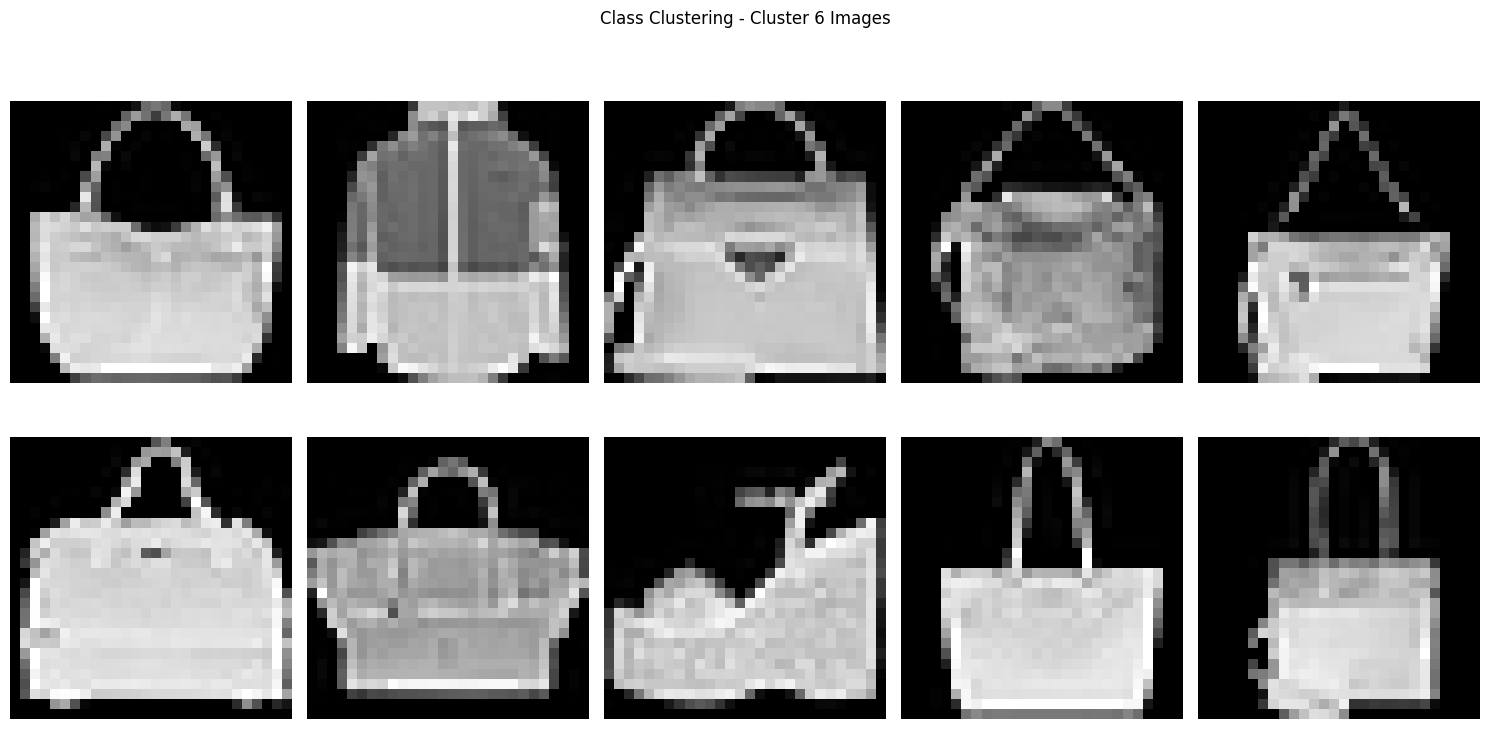

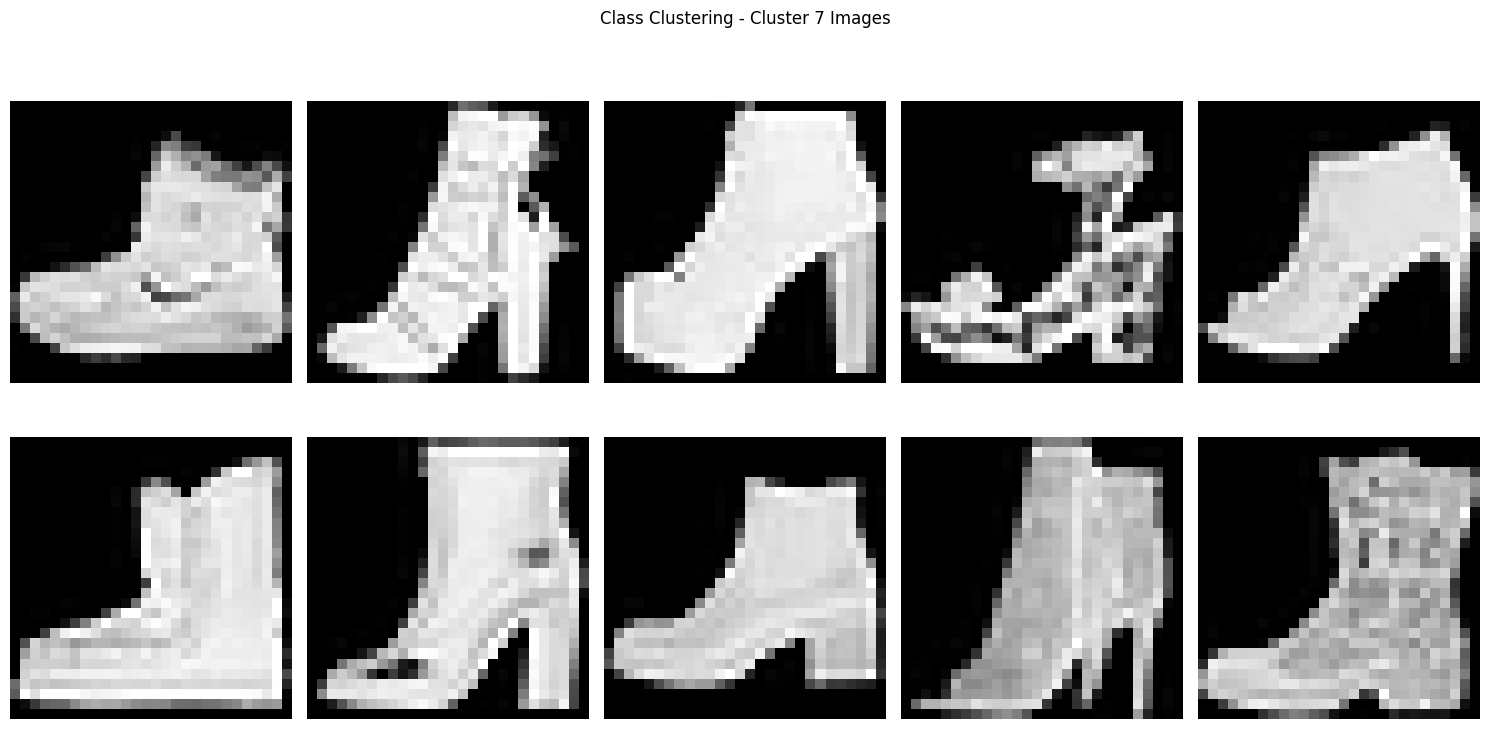

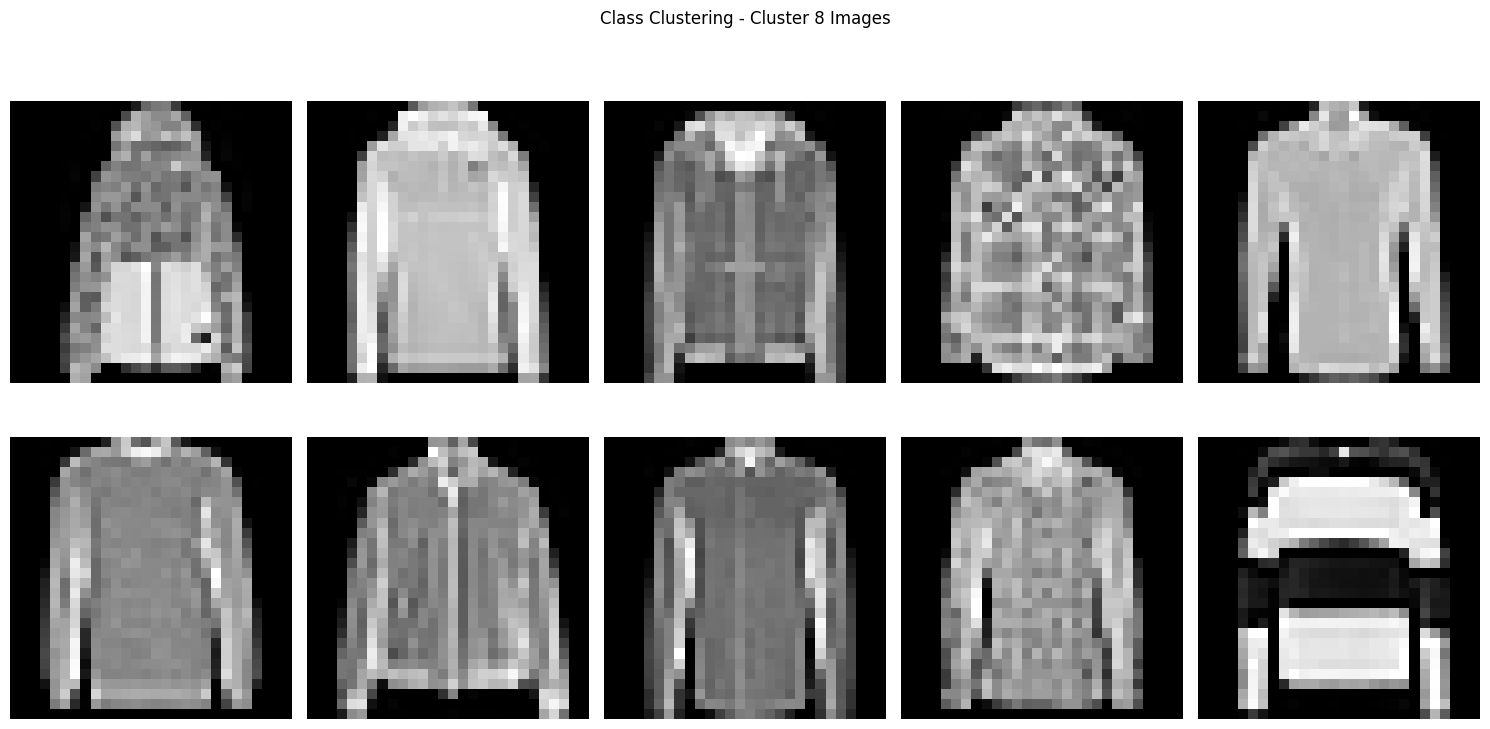

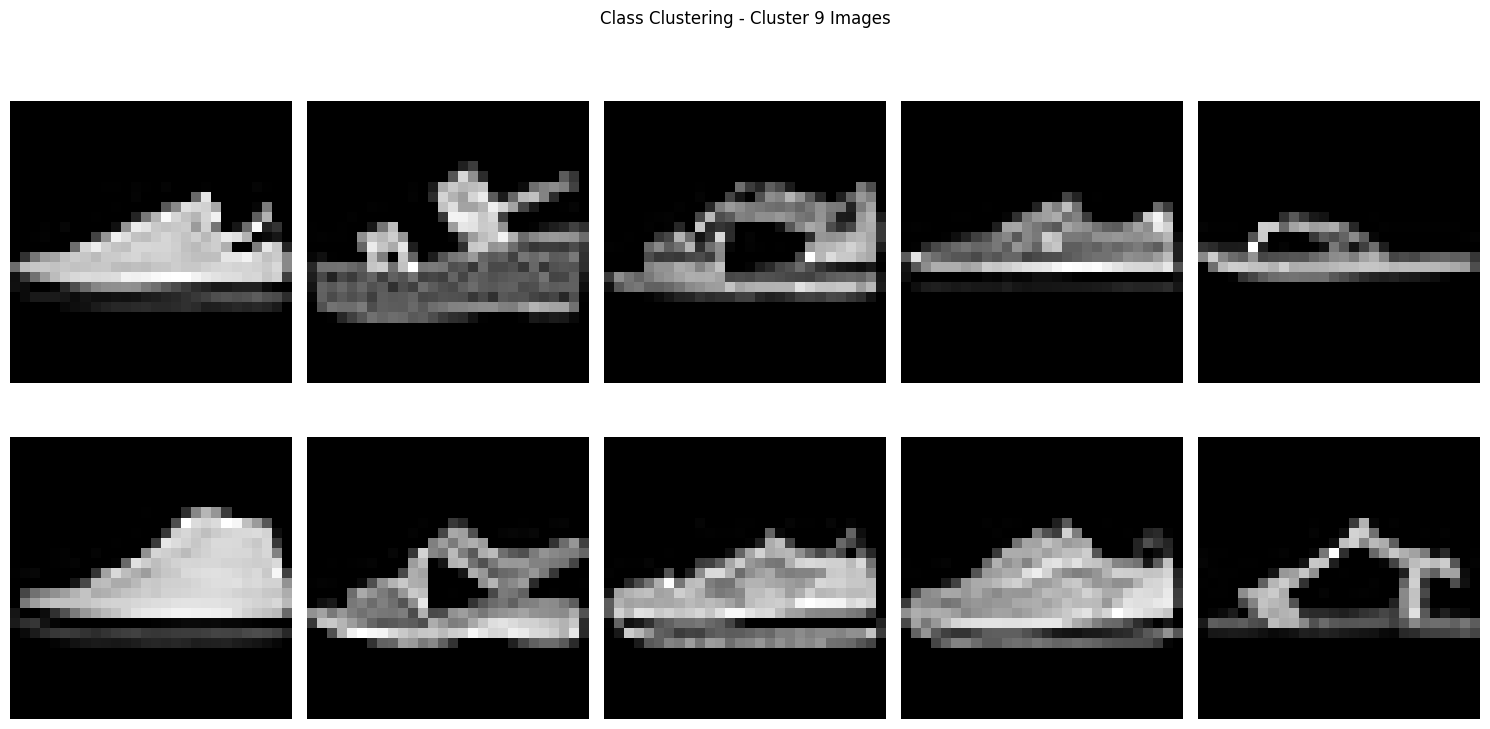

In [390]:
for cluster_idx in cluster_labels:
    plt.figure(figsize=(15, 8))
    cluster_indices = np.where(predicted_class_data == cluster_idx)[0]
    sample_indices = cluster_indices[:10] if len(cluster_indices) >= 10 else cluster_indices
    
    for i, idx in enumerate(sample_indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(image_train_data[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Class Clustering - Cluster {cluster_idx} Images")
    plt.tight_layout()

#### f) Evaluate Clusters of part a and part d with Sum of Squared Error (SSE) method. Report the scores and comment on which case is a better clustering

Random initialization produced better clustering.


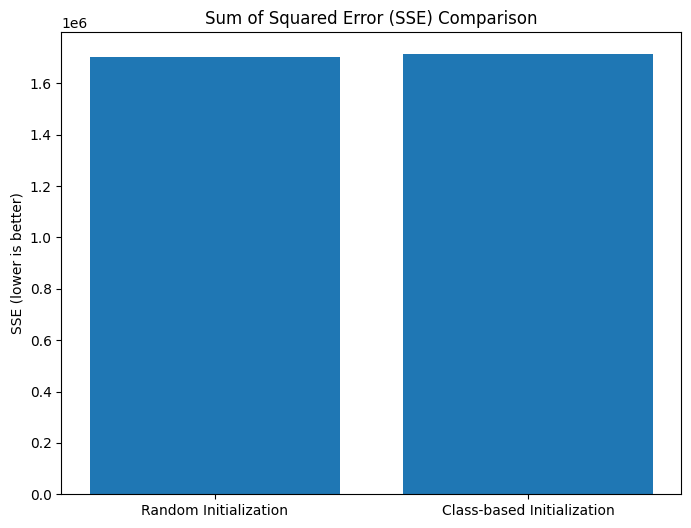

In [391]:
sse_random = kmeans.inertia_
sse_class = kmeans_class.inertia_

if sse_random < sse_class:
    print("Random initialization produced better clustering.")
else:
    print("Class-based initialization produced better clustering.")

plt.figure(figsize=(8, 6))
plt.bar(['Random Initialization', 'Class-based Initialization'], [sse_random, sse_class])
plt.title('Sum of Squared Error (SSE) Comparison')
plt.ylabel('SSE (lower is better)')
plt.show()